# Customer Profiling - Slimfit Case Study

### About Slimfit

Slimfit is a leading brand in the field of fitness equipment. Slimfit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


### Business Problem

The market research team at Slimfit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each Slimfit treadmill product by developing appropriate tables and charts.
For each Slimfit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

### Dataset

The company collected the data on individuals who purchased a treadmill from the Slimfit stores during the prior three months. The dataset has the following features:

`!gdown 1jpsnUDdschJczhpxdizjud-jZAA-GBeY`

* Product Purchased:	KP281, KP481, or KP781
* Age:	In years
* Gender:	Male/Female
* Education:	In years
* MaritalStatus:	Single or partnered
* Usage:	The average number of times the customer plans to use the treadmill each week.
* Income:	Annual income (in $)
* Fitness:	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
* Miles:	The average number of miles the customer expects to walk/run each week

### Product Portfolio:

* The KP281 is an entry-level treadmill that sells for $1,500.
* The KP481 is for mid-level runners that sell for $1,750.
* The KP781 treadmill is having advanced features that sell for $2,500.

### Steps to follow

* Defining Problem Statement and Analysing basic metrics (10 Points)
  * Observations on shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), statistical summary
* Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset
* Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)
* Visual Analysis - Univariate & Bivariate (30 Points)
  * For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)
  * For categorical variable(s): Boxplot (10 Points)
  * For correlation: Heatmaps, Pairplots(10 Points)
* Missing Value & Outlier Detection (10 Points)
  * Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median) 
* Business Insights based on Non-Graphical and Visual Analysis (10 Points)
  * Comments on the range of attributes
  * Comments on the distribution of the variables and relationship between them
  * Comments for each univariate and bivariate plot
* Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand
  * Some recommendations and actionable insights, based on the inferences.

### Questions

* Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)
* Representing the marginal probability like - what percent of customers have purchased KP281, KP481, or KP781 in a table (can use pandas.crosstab here)
* Check correlation among different factors using heat maps or pair plots.
* With all the above steps you can answer questions like: What is the probability of a male customer buying a KP781 treadmill?
* Customer Profiling - Categorization of users.
* Probability- marginal, conditional probability.

### Disclaimer

This analysis is based on the data provided and reflects the state of the dataset as of the time of the analysis. The insights and recommendations are derived solely from my point of view and the dataset in question do not necessarily represent the broader operations or circumstances of the company. The analysis assumes the accuracy of the data as received and has not been independently verified. Future analyses may yield different insights as new data becomes available or as business conditions change.

### Note on Results

Due to the large volume of results generated by this analysis, only a subset has been presented here to illustrate the key trends and patterns. Specifically, the top 10 to 15 results have been included as screenshots to provide a snapshot of the most relevant findings. For a complete view of the data and to explore additional insights, please refer to the full dataset.

# PROBLEM STATEMENT

Which type of person would buy one of these KP281, KP481, or KP781 treadmills, given Age, Gender, Education, MaritalStatus, Usage,	Fitness, Income,	Miles


# PREP FOR ANALYSIS

In [3]:
%pip install --quiet pandas
%pip install --quiet numpy
%pip install --quiet matplotlib
%pip install --quiet seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# OBSERVE DATASET

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


SHAPE:------------ 
(180, 9)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB
INFO:------------ 
None



% MISSING:------------ 
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64



% TOTAL MISSING:------------ 
0





<Axes: >

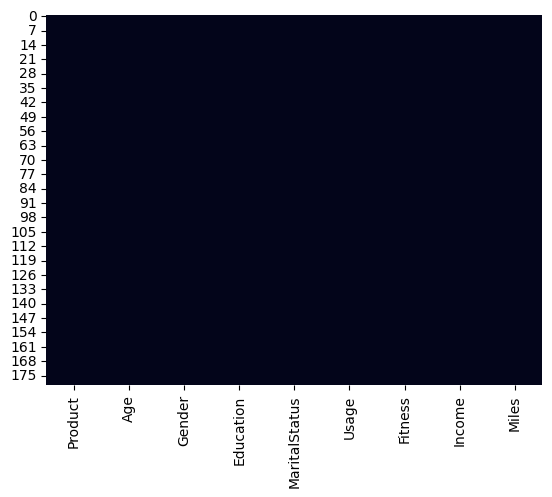

In [5]:
df = pd.read_csv("Slimfit_treadmill.csv")
display(df.head())
print(f"SHAPE:------------ \n{df.shape}\n\n\n")
print(f"INFO:------------ \n{df.info()}\n\n\n")
print(f"% MISSING:------------ \n{df.isnull().sum()}\n\n\n")
print(f"% TOTAL MISSING:------------ \n{df.isnull().sum().sum()}\n\n\n")
sns.heatmap(df.isnull(), cbar=False)

# CLEAN DATA

In [6]:
# Missing values & duplicates
missing = df.isna().sum()
dup_count = df.duplicated().sum()
missing, dup_count

(Product          0
 Age              0
 Gender           0
 Education        0
 MaritalStatus    0
 Usage            0
 Fitness          0
 Income           0
 Miles            0
 dtype: int64,
 np.int64(0))

# OPTIMISE DATA

* `object`: Default type for string. High memory. If 1000 same objects, stores 1000 of them. Allows all values.
* `category`: Optimised for repetitive data. If 1000 same objects, stores 1 of them. Throws error for non-category values.

In [7]:
# Types: number, object, bool, datetime, int64
cat_cols = df.select_dtypes(include=["object"]).columns
for c in cat_cols:
    df[c] = df[c].astype("category")
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

### Conclusion
* Shape: The dataset has 180 rows and 9 columns.
* Data Types: The dataset contains a mix of integer and object data types.
* Memory Usage: The dataset uses a total of 12.8 kilobytes of memory.
* Missing Values: None.

# DESCRIPTIVE STATS

In [8]:
print(f"SUMMARY OF CATEGORICAL VARS:------------ \n{df.describe(include=['object', 'category'])}\n\n\n")

# Mean, median gap
numeric_cols = df.select_dtypes(include=["number"]).columns
df_stats = df[numeric_cols].describe().T
df_stats["median"] = df[numeric_cols].median()
df_stats["mean_minus_median"] = df[numeric_cols].mean() - df[numeric_cols].median()
print(f"SUMMARY OF NUMERICAL VARS:------------ \n{df_stats.round(2)}\n\n\n")

print(f"UNQIUE VALUES PER COL:------------ \n{df.nunique()}")

SUMMARY OF CATEGORICAL VARS:------------ 
       Product Gender MaritalStatus
count      180    180           180
unique       3      2             2
top      KP281   Male     Partnered
freq        80    104           107



SUMMARY OF NUMERICAL VARS:------------ 
           count      mean       std      min       25%      50%       75%  \
Age        180.0     28.79      6.94     18.0     24.00     26.0     33.00   
Education  180.0     15.57      1.62     12.0     14.00     16.0     16.00   
Usage      180.0      3.46      1.08      2.0      3.00      3.0      4.00   
Fitness    180.0      3.31      0.96      1.0      3.00      3.0      4.00   
Income     180.0  53719.58  16506.68  29562.0  44058.75  50596.5  58668.00   
Miles      180.0    103.19     51.86     21.0     66.00     94.0    114.75   

                max   median  mean_minus_median  
Age            50.0     26.0               2.79  
Education      21.0     16.0              -0.43  
Usage           7.0      3.0          

# DETECT OUTLIERS

* Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)
* Outliers can be detected using statistical methods such as the IQR method or visualized using plots like box plots.


In [9]:
df_product = df["Product"].value_counts().to_frame("count")
df_product["pct"]= (df_product["count"]/len(df)).round(3) * 100
df_product

,count,pct
Product,,
KP281,80,44.4
KP481,60,33.3
KP781,40,22.2


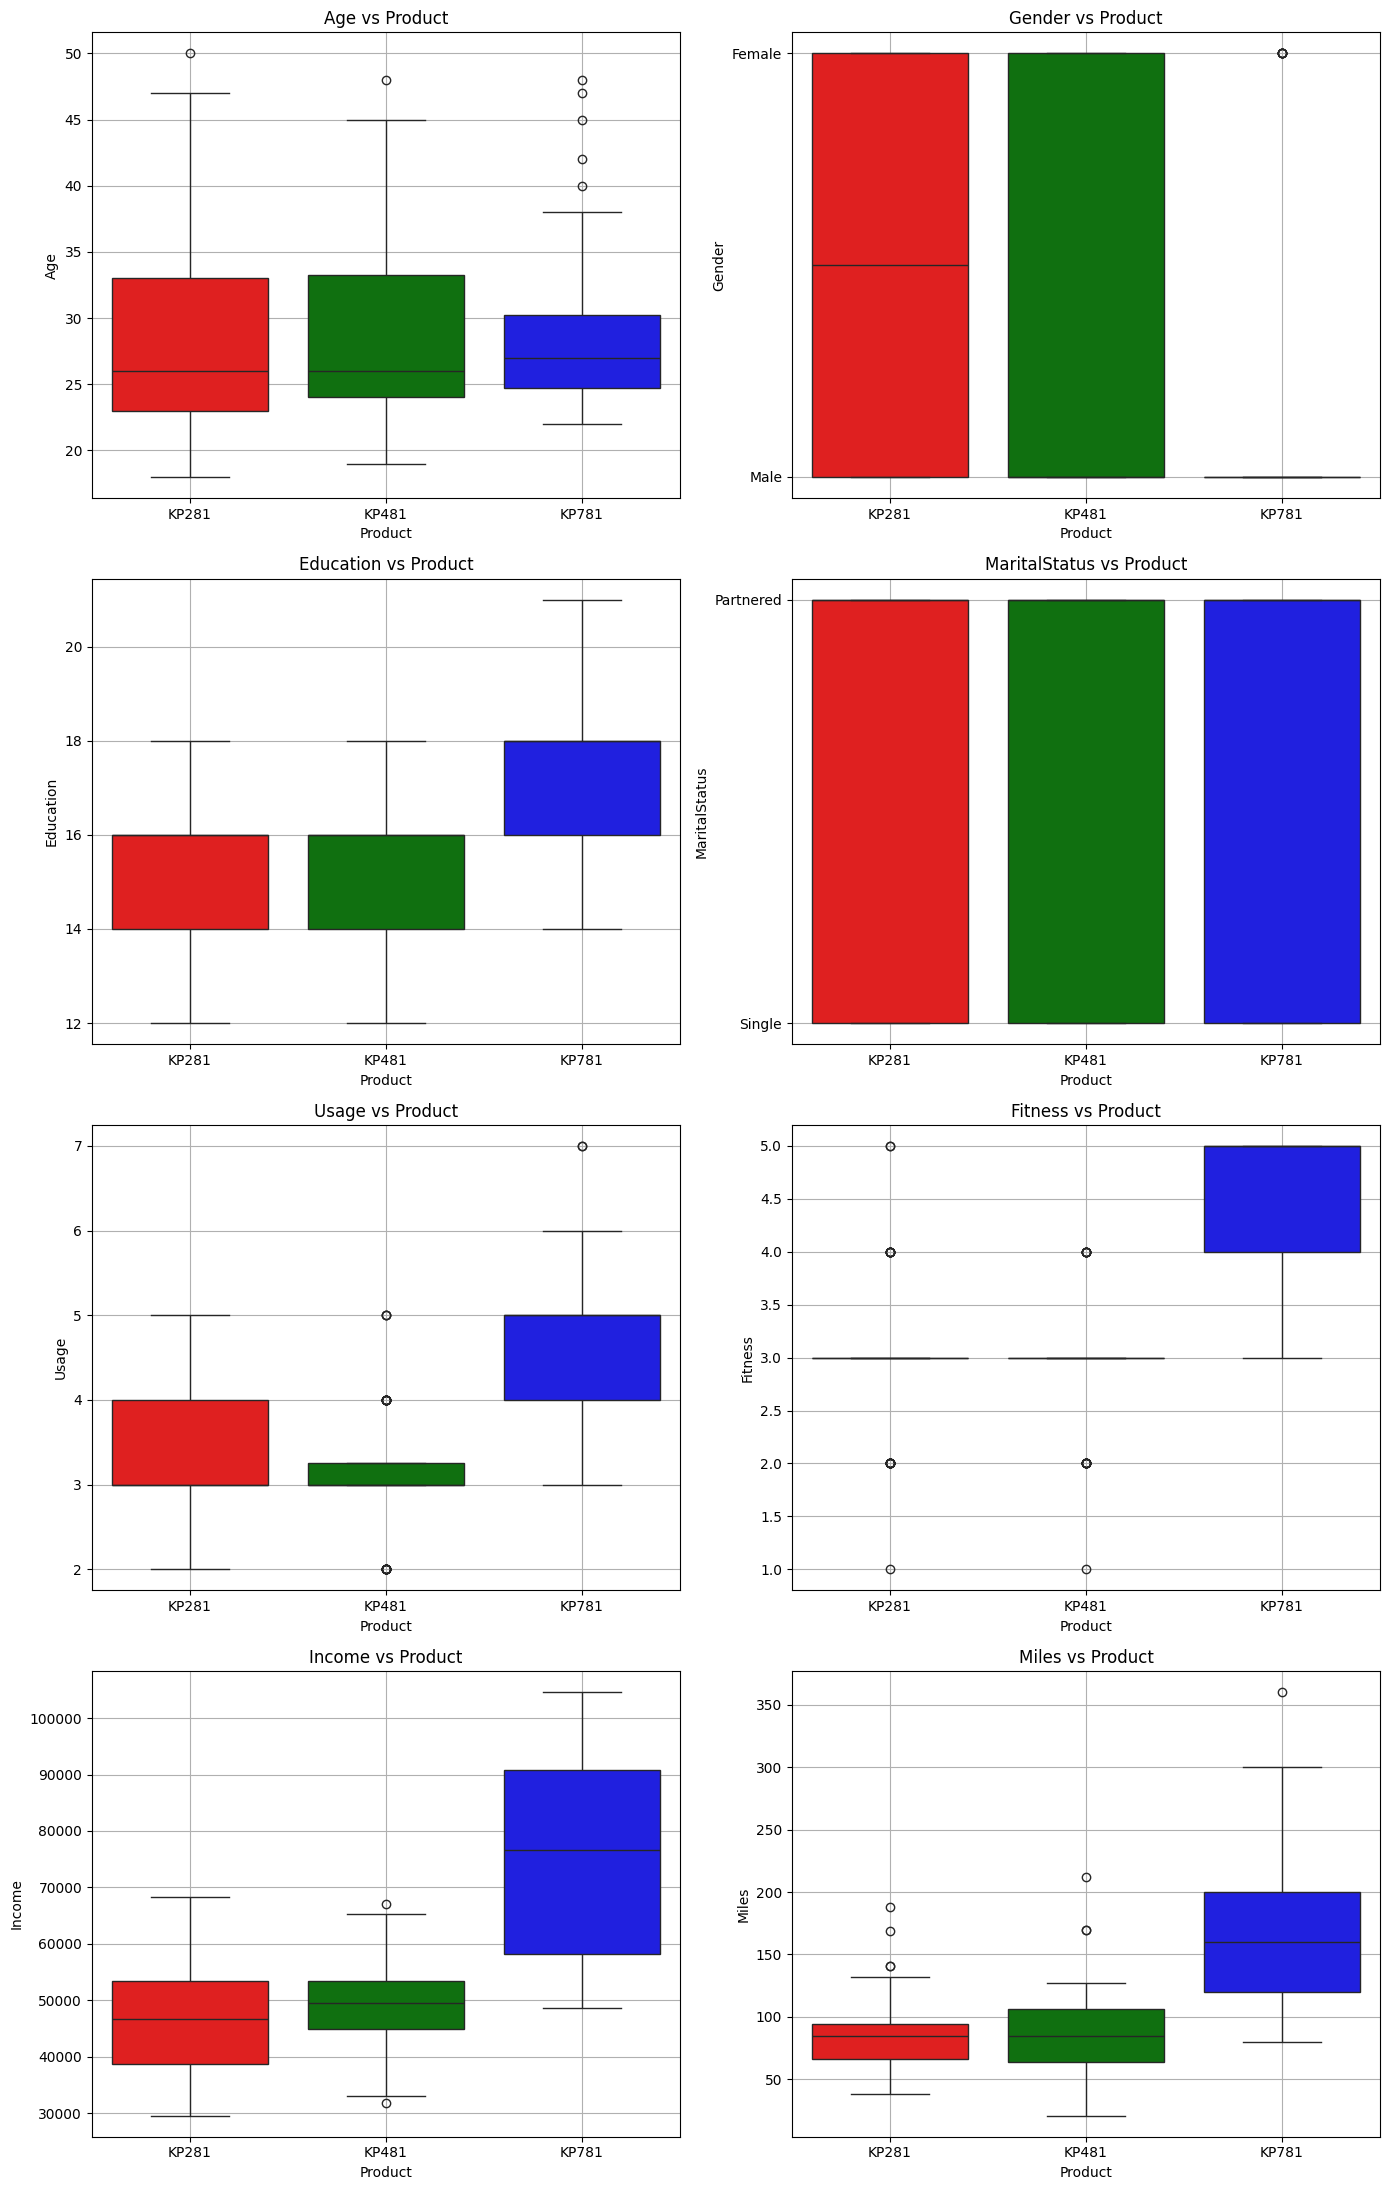

In [10]:
my_pallette = {"KP281": "r", "KP481": "g", "KP781": "b" }

fig, ax = plt.subplots(4, 2, figsize=(14, 22))

sns.boxplot(data=df, x="Product", y="Age", palette=my_pallette, hue="Product", ax=ax[0, 0])
ax[0, 0].set(title="Age vs Product", xlabel="Product", ylabel="Age")
ax[0, 0].grid(True)

sns.boxplot(data=df, x="Product", y="Gender", palette=my_pallette, hue="Product", ax=ax[0, 1])
ax[0, 1].set(title="Gender vs Product", xlabel="Product", ylabel="Gender")
ax[0, 1].grid(True)

sns.boxplot(data=df, x="Product", y="Education", palette=my_pallette, hue="Product", ax=ax[1, 0])
ax[1, 0].set(title="Education vs Product", xlabel="Product", ylabel="Education")
ax[1, 0].grid(True)

sns.boxplot(data=df, x="Product", y="MaritalStatus", palette=my_pallette, hue="Product", ax=ax[1, 1])
ax[1, 1].set(title="MaritalStatus vs Product", xlabel="Product", ylabel="MaritalStatus")
ax[1, 1].grid(True)

sns.boxplot(data=df, x="Product", y="Usage", palette=my_pallette, hue="Product", ax=ax[2, 0])
ax[2, 0].set(title="Usage vs Product", xlabel="Product", ylabel="Usage")
ax[2, 0].grid(True)

sns.boxplot(data=df, x="Product", y="Fitness", palette=my_pallette, hue="Product", ax=ax[2, 1])
ax[2, 1].set(title="Fitness vs Product", xlabel="Product", ylabel="Fitness")
ax[2, 1].grid(True)

sns.boxplot(data=df, x="Product", y="Income", palette=my_pallette, hue="Product", ax=ax[3, 0])
ax[3, 0].set(title="Income vs Product", xlabel="Product", ylabel="Income")
ax[3, 0].grid(True)

sns.boxplot(data=df, x="Product", y="Miles", palette=my_pallette, hue="Product", ax=ax[3, 1])
ax[3, 1].set(title="Miles vs Product", xlabel="Product", ylabel="Miles")
ax[3, 1].grid(True)


plt.tight_layout()
plt.show()


#### Conclusion
* Age Distribution: All 3 products are bought by younger customers (median age below 30),  the KP781 has smaller range comapred to the other 2 products.
* Education: Customers across all products have a similar range of education (14 to 16 years), though KP781 buyers show slightly higher education levels.
* Usage: The usage patterns are quite consistent across all products, with most users planning to use their treadmills between 3 to 5 times per week.
* Income: As expected, the KP781 buyers tend to have higher incomes (median above 75,000 USD), while KP281 customers have lower incomes (median around 45,000 USD).
* Miles: KP781 customers cover more miles (higher medians and greater range), while KP281 and KP481 customers have lower ranges than the lowest quartile of KP781.


# Check if features like marital status, age have any effect on the product purchased (using countplot, histplots, boxplots etc)

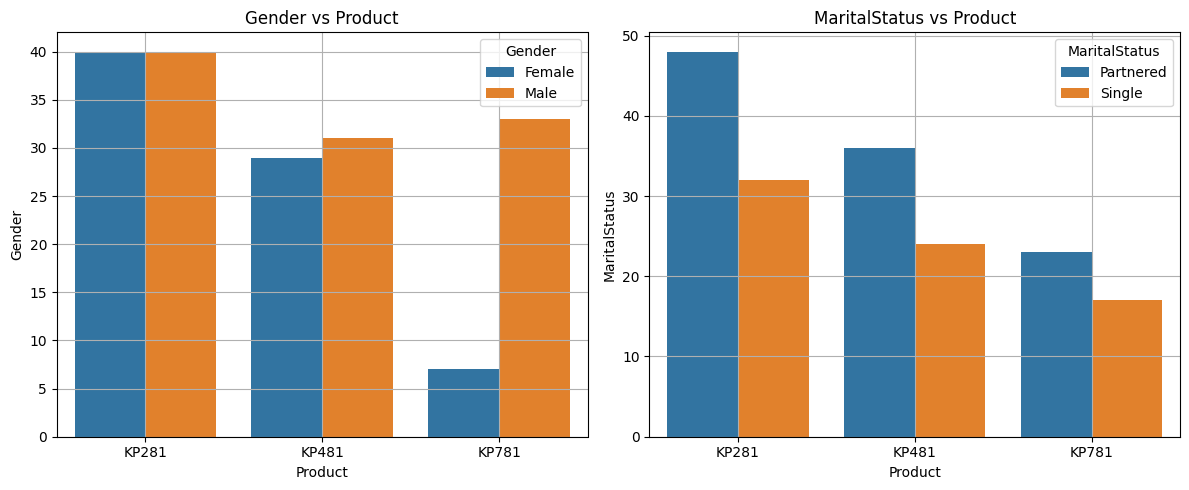

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(data=df, x="Product", hue="Gender", ax=ax[0])
ax[0].set(title="Gender vs Product", xlabel="Product", ylabel="Gender")
ax[0].grid(True)

sns.countplot(data=df, x="Product", hue="MaritalStatus", ax=ax[1])
ax[1].set(title="MaritalStatus vs Product", xlabel="Product", ylabel="MaritalStatus")
ax[1].grid(True)

plt.tight_layout()
plt.show()

#### Conclusion
* Gender: There is a higher proportion of male customers purchasing all three treadmill models. However, the distribution across products is quite similar between genders, with a significant edge for males in the KP781 segments.
* Marital Status: Single customers are more likely to buy the entry-level KP281 model, while partnered customers are more inclined toward the higher-end KP781. The mid-range KP481 seems to have a balanced distribution between single and partnered customers.


# What percent of customers have purchased KP281, KP481, or KP781 in a table (Marginal Probabilities)

In [12]:
print(f"GENDER VS PRODUCT---------")
display(
    pd.crosstab(
        index=df["Product"],
        columns=df["Gender"],
        normalize="index"
    )
)

print(f"\n\n\nMARITAL STATUS VS PRODUCT---------")
display(
    pd.crosstab(
        index=df["Product"],
        columns=df["MaritalStatus"],
        normalize="index"
    )
)

print(f"\n\n\nMARGINAL PROB - % Customers buying each product---------")
display(
    df["Product"].value_counts(normalize=True) * 100
)

GENDER VS PRODUCT---------


Gender,Female,Male
Product,,
KP281,0.500000,0.500000
KP481,0.483333,0.516667
KP781,0.175000,0.825000





MARITAL STATUS VS PRODUCT---------


MaritalStatus,Partnered,Single
Product,,
KP281,0.600,0.400
KP481,0.600,0.400
KP781,0.575,0.425





MARGINAL PROB - % Customers buying each product---------


Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: proportion, dtype: float64

#### Conclusion
* Men dominate in KP781 higher end model while the other 2 models are fairly evenly distributed.
* Couples seems to prefer the products more than singles.
* KP281 is most popular product followed by KP481 and then KP781.

# What is the probability of a male customer buying a KP781 treadmill?

In [22]:
# Calculate the number of male customers who bought KP781
male_kp781_count = df[(df['Gender'] == 'Male') & (df['Product'] == 'KP781')].shape[0]

# Calculate the total number of male customers
total_male_count = df[df['Gender'] == 'Male'].shape[0]

# Probability of a male customer buying a KP781
prob_male_kp781 = male_kp781_count / total_male_count

prob_male_kp781

0.3173076923076923

#### Conclusion
* There is 32% that a male customer would buy a KP781 Treadmill.

# Check correlation among different factors

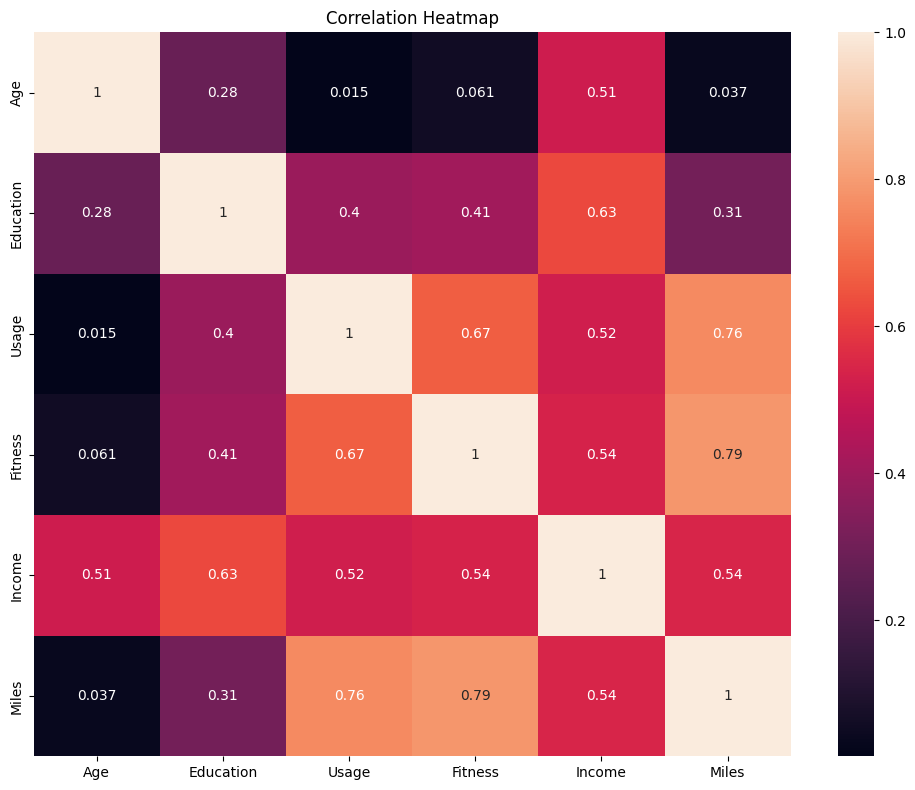

In [13]:
# Types: number, object, bool, datetime, int64
numerical_cols = df.select_dtypes(include=["number"]).columns

corr_matrix = df[numerical_cols].corr()

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, ax=ax)
ax.set(title="Correlation Heatmap", xlabel="", ylabel="")

plt.tight_layout()
plt.show()

#### Conclusion
* High correlation between fitness, usage vs miles which is expected. The more you run more fit you are.
* Usage has negative correlation w.r.t age. Also makes sense as you get older you will not be able to move more.
* Higher the education greater the income so sell more to educated people.

# Customer Profiling - Categorization of users.

In [14]:
# Manual Segmentation using thresholds
df["Income_Category"] = pd.cut(
    df["Income"],
    bins=[0, 50_000, 100_000, np.inf],
    labels=["Low Income", "Medium Income", "High Income"]
)

df["Fitness_Category"] = pd.cut(
    df["Fitness"],
    bins=[0, 2, 4, 5],
    labels=["Low Fitness", "Medium Fitness", "High Fitness"]
)

df["Usage_Category"] = pd.cut(
    df["Usage"],
    bins=[0, 3, 5, np.inf],
    labels=["Low Usage", "Medium Usage", "High Usage"]
)

# Combine caregories into a single customer profile
df["Customer_Profile"] = (
    df["Income_Category"].astype(str) + ' | ' +
    df["Fitness_Category"].astype(str) + ' | ' +
    df["Usage_Category"].astype(str)
)

df.loc[:, ["Income", "Fitness", "Usage", "Customer_Profile"]].head()

,Income,Fitness,Usage,Customer_Profile
0,29562,4,3,Low Income | Medium Fitness | Low Usage
1,31836,3,2,Low Income | Medium Fitness | Low Usage
2,30699,3,4,Low Income | Medium Fitness | Medium Usage
3,32973,3,3,Low Income | Medium Fitness | Low Usage
4,35247,2,4,Low Income | Low Fitness | Medium Usage


,Product,Metric,Avg Value
0,KP281,avg_age,28.550
1,KP481,avg_age,28.900
2,KP781,avg_age,29.100
3,KP281,avg_income,46418.025
4,KP481,avg_income,48973.650


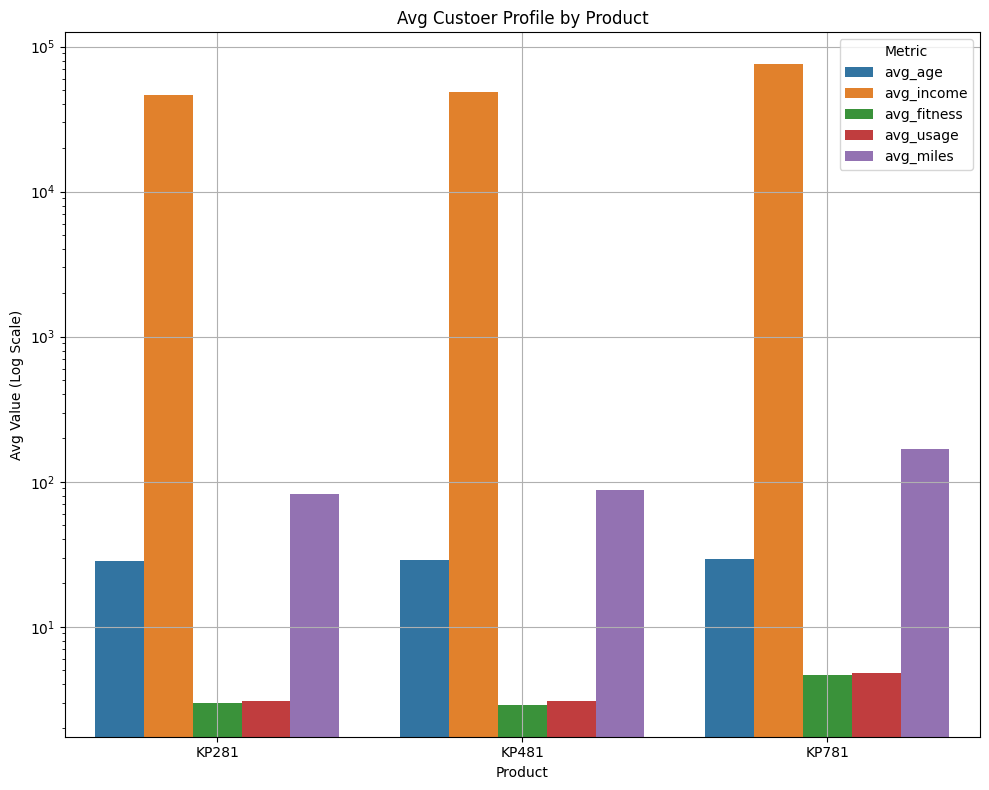

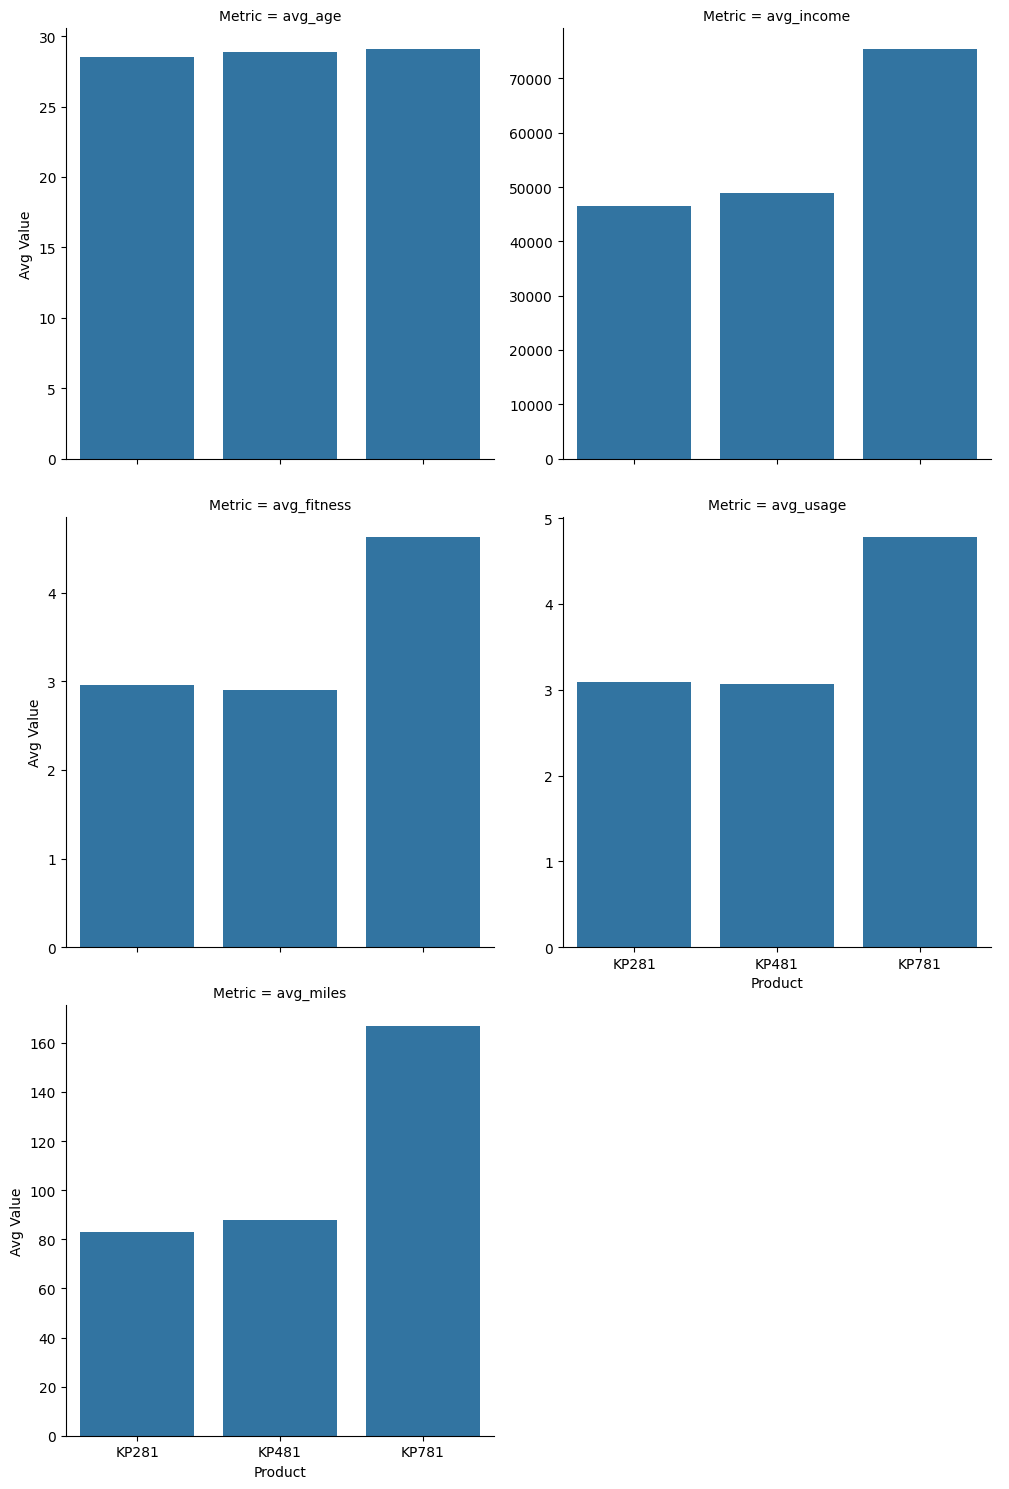

In [21]:
# Categorise by product preferences
df_grouped_by_product = df.groupby(["Product"], observed=False).agg(
    avg_age=("Age", "mean"),
    avg_income=("Income", "mean"),
    avg_fitness=("Fitness", "mean"),
    avg_usage=("Usage", "mean"),
    avg_miles=("Miles", "mean")
).reset_index()

df_melt = df_grouped_by_product.melt(
    id_vars="Product",
    var_name="Metric",
    value_name="Avg Value"
)

display(df_melt.head())

fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df_melt, x="Product", y="Avg Value", hue="Metric", ax=ax)
ax.set(title="Avg Custoer Profile by Product", xlabel="Product", ylabel="Avg Value (Log Scale)")
ax.set_yscale("log") # Since income is too large, its dwarfing others on chart
ax.grid(True)
plt.tight_layout()
plt.show()

# -----------------------------------------------------------------------

# Create separate charts for each metric. catplot creates its own figure
sns.catplot(
    data=df_melt, 
    x="Product", 
    y="Avg Value", 
    col="Metric", 
    kind="bar", 
    col_wrap=2,    # Adjust columns per row
    sharey=False,   # This is the key: each plot gets its own Y-scale
)
plt.tight_layout()
plt.show()

In [16]:
# AGE VS MILES
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[18, 30, 45, 60, np.inf],
    labels=["Young", "Middle-Aged", "Older", "Senior"]
)

df["Miles_Group"] = pd.cut(
    df["Miles"],
    bins=[0, 10, 20, 30, np.inf],
    labels=["Low Miles", "Medium Miles", "High Miles", "Very High Miles"]
)

df["Customer_Profile"] = (
    df["Age_Group"].astype(str) + " | " +
    df["Miles_Group"].astype(str)
)

df.loc[:, ["Age", "Miles", "Customer_Profile"]].head()

,Age,Miles,Customer_Profile
0,18,112,nan | Very High Miles
1,19,75,Young | Very High Miles
2,19,66,Young | Very High Miles
3,19,85,Young | Very High Miles
4,20,47,Young | Very High Miles


In [18]:
# Pivot Table for quick insights - analyze avg metrics by product
df.pivot_table(
    index="Product",
    values=["Age", "Income", "Fitness", "Usage", "Miles"],
    aggfunc="mean",
    observed=False
)

,Age,Fitness,Income,Miles,Usage
Product,,,,,
KP281,28.55,2.9625,46418.025,82.787500,3.087500
KP481,28.90,2.9000,48973.650,87.933333,3.066667
KP781,29.10,4.6250,75441.575,166.900000,4.775000


#### Conclusion
* KP781 seems to be the best value product.
* Mostly attractive to young customers with high miles
* Avg age of users seems to be around 28 to 30 for all prodcuts
* KP781 users seem to have high miles and greater useage compared to other 2.

# RECOMMENDATIONS
1. Couples prefer to buy our products.
2. KP781 the highest end model has the best value for customer based on usage and miles covered which shows their satisfaction levels or could be high achiever mentality.
3. Young customers age 28 to 30 seem to buy our products.
4. Sell to health concsious, highly educated customers.
5. Sell high end products to male customers.